In [2]:
include("../src/post_funcs.jl")

using CornerPlot

INFO: Checking out Gadfly tn/density-revamp...
INFO: Pulling Gadfly latest tn/density-revamp...
INFO: No packages to install, update or remove


error: incorrect number of arguments
usage: julia run_mcmc.jl <sample number> <parameter config>


In [32]:
Pkg.checkout("KernelDensity", "master")

INFO: Checking out KernelDensity master...
INFO: Pulling KernelDensity latest master...


LoadError: [91mfixed packages introduce conflicting requirements for Optim: 
         KernelDensity requires versions [0.16.0,∞) [none of the available versions can satisfy this requirement]
       available versions are 0.4.5, 0.4.6, 0.4.7, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.7.4, 0.7.5, 0.7.7, 0.7.8, 0.9.0, 0.9.1, 0.9.2, 0.9.3, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2 and 0.15.3[39m

categorical variable. Transforming x to be categorical.
categorical variable. Transforming x to be categorical.


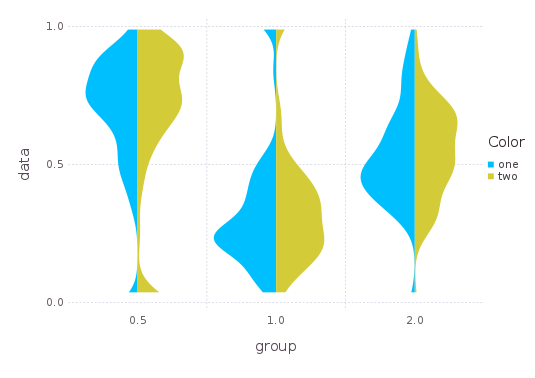

categorical variable. Transforming x to be categorical.


In [37]:
#import Distributions.Beta
data = vcat(rand(Beta(2,5), 100), 1-rand(Beta(2,5), 100), 0.25+rand(Beta(2,5), 100));
types = repeat([:one, :two], outer=150);
group = vcat(fill(1, 100), fill(0.5, 100), fill(2, 100));
df = DataFrame(data=data, group=group);
p = plot(df, x=:group, y=:data, color=types, Geom.violin(trim = false))#(split=true, trim=false))

In [9]:
parplot = all_param_violins(1)

draw(SVG("finfigs/all_param_violin_Re.svg", 12inch, 10inch), parplot)
draw(PDF("finfigs/all_param_violin_Re.pdf", 12inch, 10inch), parplot)
draw(PNG("finfigs/all_param_violin_Re.png", 12inch, 10inch), parplot)
display("image/png", read("finfigs/all_param_violin_Re.png"))

/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/Re/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re_surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/Re_surf_vdisp/max_init/
/

LoadError: [91mDimensionMismatch("tried to assign 257-element array to 1×258 destination")[39m

In [3]:
# just one central panel for R_e
blsamps1 = Array{Array{Float64, 1}, 1}()
blsamps2 = Array{Array{Float64, 1}, 1}()
for s in 1:4
    chain, likevals = get_chain_likevals(s, 5, 75:100, subdir = "max_init")
    push!(blsamps1, chain[6, :])
    chain, likevals = get_chain_likevals(s, 6, 75:100, subdir = "max_init")
    push!(blsamps2, chain[6, :])
end
dat1 = vcat(blsamps1...)
dat2 = vcat(blsamps2...)
data = vcat(dat1, dat2)
types = vcat(fill("vdisp", 4 * size(blsamps1[1])[1]), fill("surf", 4 * size(blsamps2[1])[1]))
group = vcat(fill("m1", size(blsamps1[1])[1]), fill("m2", size(blsamps1[1])[1]),
             fill("m3", size(blsamps1[1])[1]), fill("m4", size(blsamps1[1])[1]),
             fill("m1", size(blsamps2[1])[1]), fill("m2", size(blsamps2[1])[1]),
             fill("m3", size(blsamps2[1])[1]), fill("m4", size(blsamps2[1])[1]))
df = DataFrame(data=data, group=group);
#p = plot(df, x=:group, y=:data, color=types, Geom.violin(trim = false))#(split=true, trim=false))

/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re_surf/max_init/


In [10]:
#plot(df[df[:group] .== "m1", :], x = :data, Geom.histogram)
nsamps = size(blsamps1[1])[1]
taips = vcat(fill("vdisp", nsamps), fill("surf", nsamps))
#l = layer(df[(df[:group] .== "m3"), :], x=:group, y=:data, color = taips, Geom.violin(trim = false)) #color=types, Geom.violin) #(trim = false))#(split=true, trim=false))
l = layer(df[(df[:group] .== "m1") .& (types .== "surf"), :], x=:group, y=:data, Geom.violin(trim = false)) #color=types, Geom.violin) #(trim = false))#(split=true, trim=false))

1-element Array{Gadfly.Layer,1}:
 Gadfly.Layer(312000×2 DataFrames.DataFrame
│ Row    │ data       │ group │
├────────┼────────────┼───────┤
│ 1      │ 0.182568   │ m1    │
│ 2      │ -1.50622   │ m1    │
│ 3      │ 0.00674152 │ m1    │
│ 4      │ 0.00493576 │ m1    │
│ 5      │ 0.557752   │ m1    │
│ 6      │ 0.111209   │ m1    │
│ 7      │ 0.223924   │ m1    │
│ 8      │ 0.404569   │ m1    │
│ 9      │ -1.63388   │ m1    │
│ 10     │ -0.169688  │ m1    │
│ 11     │ 0.175392   │ m1    │
⋮
│ 311989 │ 0.123334   │ m1    │
│ 311990 │ 0.116884   │ m1    │
│ 311991 │ 0.0189849  │ m1    │
│ 311992 │ 0.184995   │ m1    │
│ 311993 │ 0.109389   │ m1    │
│ 311994 │ -0.765611  │ m1    │
│ 311995 │ 0.178439   │ m1    │
│ 311996 │ 1.01798    │ m1    │
│ 311997 │ 0.666736   │ m1    │
│ 311998 │ -1.10132   │ m1    │
│ 311999 │ 0.126507   │ m1    │
│ 312000 │ 0.232345   │ m1    │, Dict{Symbol,Any}(Pair{Symbol,Any}(:y, :data),Pair{Symbol,Any}(:x, :group)), Gadfly.StatisticElement[], Gadfly.Geom.Violi

In [11]:
plot(l)

DimensionMismatch: [91mDimensionMismatch("tried to assign 257-element array to 1×258 destination")[39m

In [22]:
#p = plot(df[(df[:group] .== "m3") .& (types .== "surf"), rand(1:end, 100)], y=:data, Geom.violin(order=2, trim = false))  #, Stat.violin)
#p = plot(df[(df[:group] .== "m3") .& (types .== "surf"), rand(1:end, 100)], x=:data, Geom.density(bandwidth=0.5))  #, Stat.violin)
#plot(df[(df[:group] .== "m3") .& (types .== "surf"), :], x=:data, Geom.histogram)
testdat = Array(df[(df[:group] .== "m1") .& (types .== "surf"), :][:data])
#Stat.density(n=256, bandwidth=-Inf)
k = KernelDensity.kde(testdat,
                      kernel=Normal,
                      boundary = extrema(testdat),
                      npoints = 256,
                      bandwidth = 0.001)
                      #bandwidth=KernelDensity.default_bandwidth(testdat))

KernelDensity.UnivariateKDE{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}(-3.10582561222382:0.024052656180987193:3.003549057746927, [0.000242226, 0.000290128, 3.66991e-7, 0.0, 5.41854e-8, 0.0, 5.39384e-7, 0.00037221, 0.000269193, 0.000157507  …  0.00018485, 0.000412332, 0.000141171, 0.000274371, 0.00025761, 0.000105388, 0.000711493, 6.34325e-5, 0.000203653, 7.33243e-7])

In [30]:
length(KernelDensity.kde_range((0.12698109160784082, 0.9785547869337731), 256))

255

In [29]:
println(minimum(testdat))
println(extrema(testdat))
minimum(testdat) .>= extrema(testdat)[1]

-3.10582561222382
(-3.10582561222382, 3.027601713927914)


true

In [23]:
collect(k.x)

255-element Array{Float64,1}:
 -3.10583
 -3.08177
 -3.05772
 -3.03367
 -3.00961
 -2.98556
 -2.96151
 -2.93746
 -2.9134 
 -2.88935
 -2.8653 
 -2.84125
 -2.81719
  ⋮      
  2.73897
  2.76302
  2.78708
  2.81113
  2.83518
  2.85923
  2.88329
  2.90734
  2.93139
  2.95544
  2.9795 
  3.00355

In [138]:
(plt, coord, plt_aes,
 layer_aess, layer_stats, layer_subplot_aess, layer_subplot_datas,
 scales, guides) = Gadfly.render_prepare(p)

LoadError: [91mDimensionMismatch("tried to assign 257-element array to 1×258 destination")[39m

In [132]:
stat = Gadfly.Stat.DensityStatistic(256, -Inf, 1.0, Normal, true, :area, :dodge, :vertical, true)
viogeom = Gadfly.Geom.ViolinGeometry(stat, 1, Symbol(""))
output_dims, groupon = Gadfly.Stat._find_output_dims(stat)
grouped_data = Gadfly.groupby(plt_aes, groupon, output_dims[2])
violins = Array{NTuple{2, Float64}}[]

color_opts = unique(plt_aes.color)

key1 = collect(keys(grouped_data))[1]
val1 = grouped_data[key1]
x, color = key1
ys = getfield(plt_aes, output_dims[2])[val1]
ws = plt_aes.width[val1]

pos = findfirst(color_opts, color)
[(x - w/2, y) for (y, w) in zip(ys, ws)]

258-element Array{Tuple{Float64,Float64},1}:
 (1.0, -4.02487)     
 (0.999991, -4.02487)
 (0.999995, -3.99144)
 (0.999998, -3.95801)
 (1.0, -3.92458)     
 (1.0, -3.89116)     
 (0.999998, -3.85773)
 (0.999995, -3.8243) 
 (0.999988, -3.79087)
 (0.999983, -3.75744)
 (0.999982, -3.72401)
 (0.999982, -3.69058)
 (0.999979, -3.65715)
 ⋮                   
 (0.999987, 4.16522) 
 (0.999986, 4.19865) 
 (0.999989, 4.23208) 
 (0.999994, 4.26551) 
 (0.999998, 4.29894) 
 (0.999999, 4.33237) 
 (1.0, 4.3658)       
 (0.999998, 4.39923) 
 (0.999995, 4.43265) 
 (0.999991, 4.46608) 
 (0.999988, 4.49951) 
 (1.0, 4.49951)      

In [121]:
keys(color_opts)

LoadError: [91mUndefVarError: color_opts not defined[39m

In [63]:
parplot = all_param_violins(3)

draw(SVG("finfigs/all_param_violin_vdisp_cutoff.svg", 12inch, 10inch), parplot)
draw(PDF("finfigs/all_param_violin_vdisp_cutoff.pdf", 12inch, 10inch), parplot)
draw(PNG("finfigs/all_param_violin_vdisp_cutoff.png", 12inch, 10inch), parplot)
display("image/png", read("finfigs/all_param_violin_vdisp_cutoff.png"))

/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re_surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/R

LoadError: [91mDimensionMismatch("tried to assign 257-element array to 1×258 destination")[39m

/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/Re/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re_surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/Re_surf_vdisp/max_init/


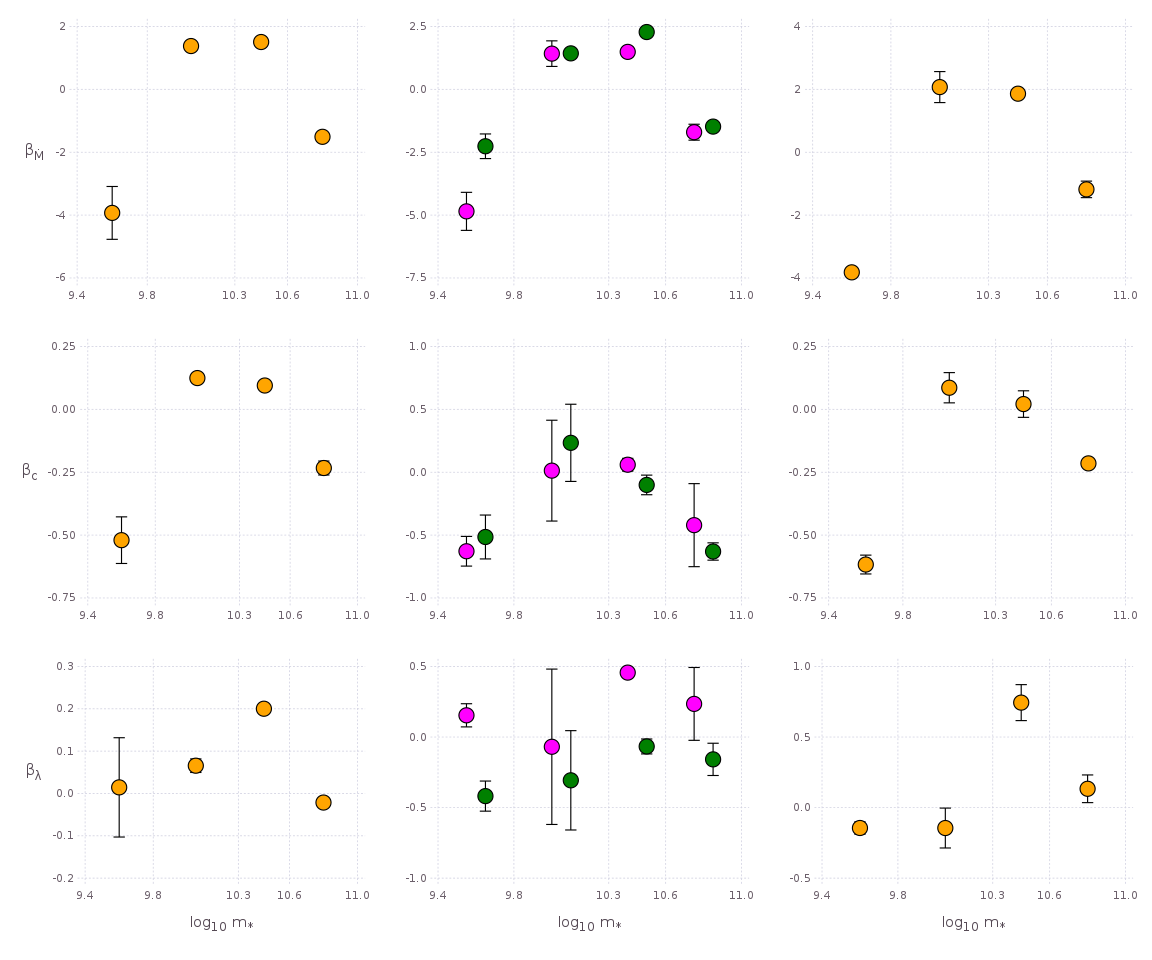

/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re_surf_vdisp/max_init/


In [1077]:
parplot = all_param_plot(1)

draw(SVG("finfigs/all_param_plot_Re_cutoff.svg", 12inch, 10inch), parplot)
draw(PDF("finfigs/all_param_plot_Re_cutoff.pdf", 12inch, 10inch), parplot)
draw(PNG("finfigs/all_param_plot_Re_cutoff.png", 12inch, 10inch), parplot)
display("image/png", read("finfigs/all_param_plot_Re_cutoff.png"))

/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re_surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/Re_surf_v

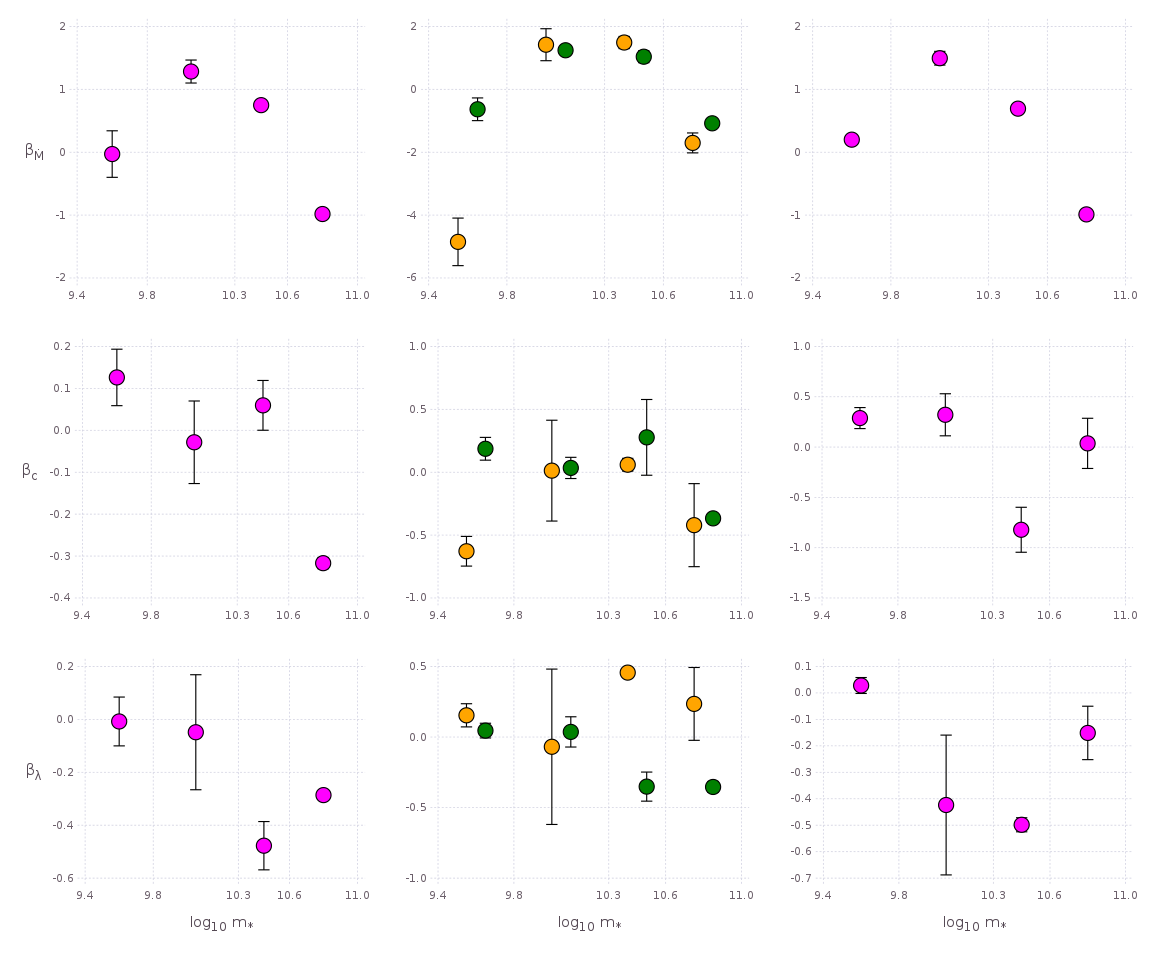

/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re_surf_vdisp/max_init/


In [1078]:
parplot = all_param_plot(2)

draw(SVG("finfigs/all_param_plot_surf_cutoff.svg", 12inch, 10inch), parplot)
draw(PDF("finfigs/all_param_plot_surf_cutoff.pdf", 12inch, 10inch), parplot)
draw(PNG("finfigs/all_param_plot_surf_cutoff.png", 12inch, 10inch), parplot)
display("image/png", read("finfigs/all_param_plot_surf_cutoff.png"))

/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re_surf/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re_surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/Re_surf_v

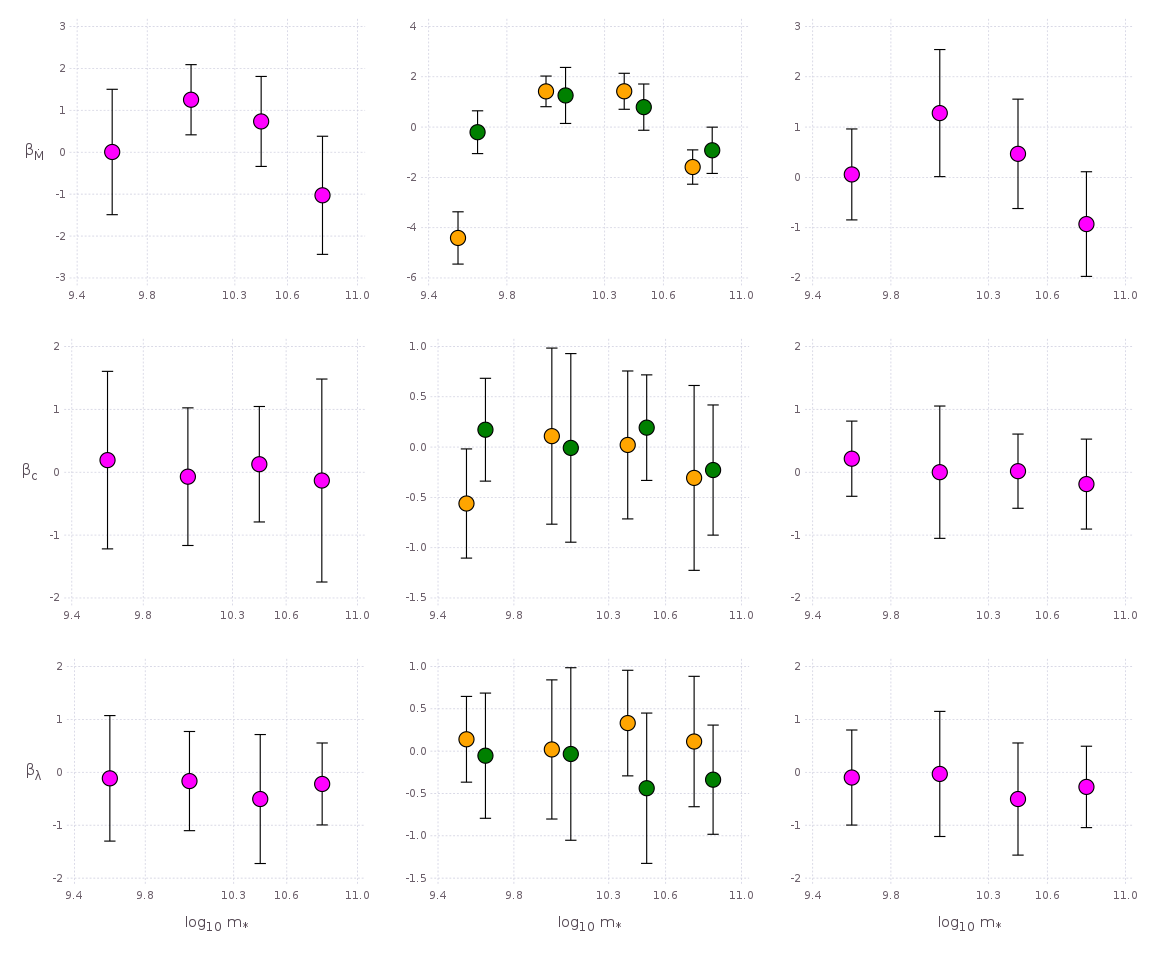

/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re_surf_vdisp/max_init/


In [893]:
parplot = all_param_plot(2)

draw(SVG("finfigs/all_param_plot_surf.svg", 12inch, 10inch), parplot)
draw(PDF("finfigs/all_param_plot_surf.pdf", 12inch, 10inch), parplot)
draw(PNG("finfigs/all_param_plot_surf.png", 12inch, 10inch), parplot)
display("image/png", read("finfigs/all_param_plot_surf.png"))

/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re_surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/R

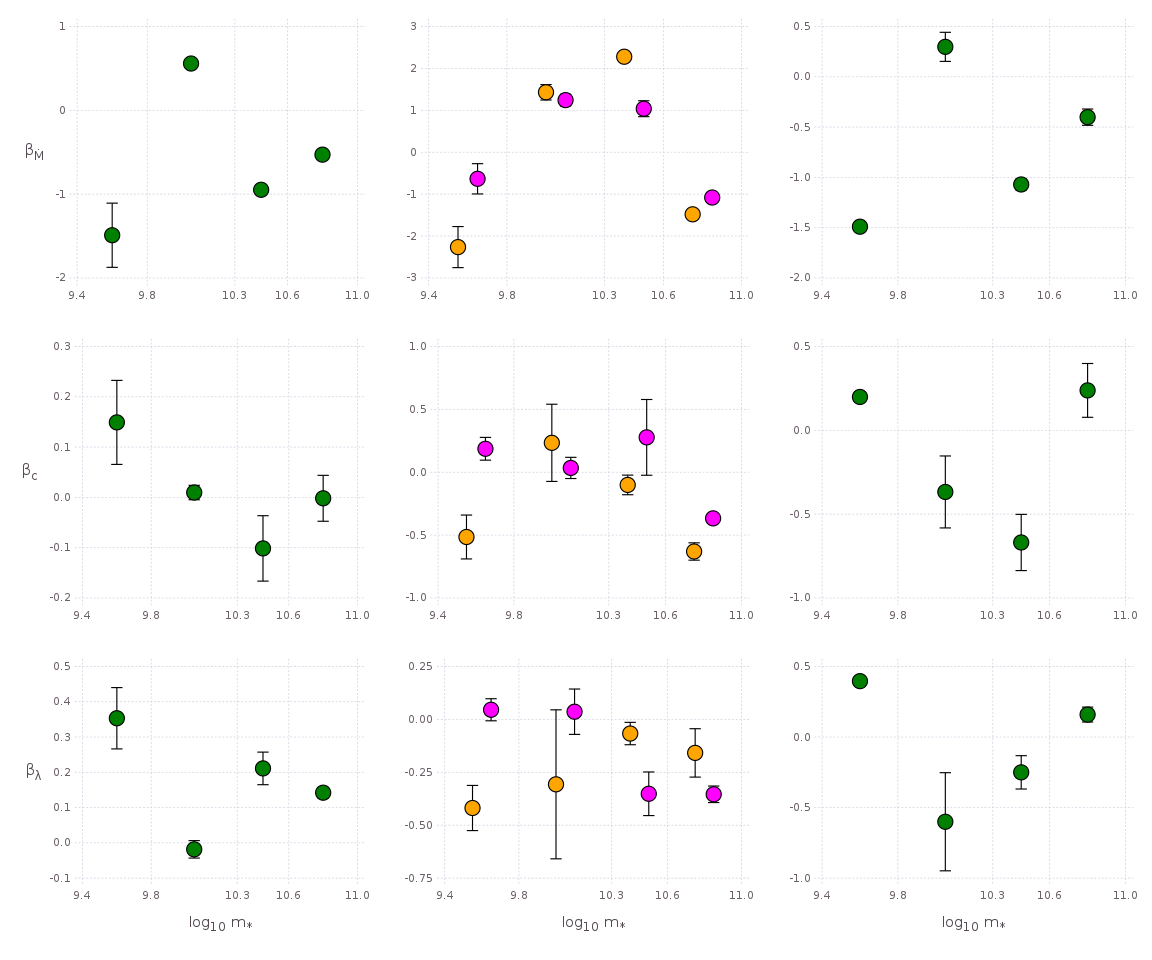

/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re_surf_vdisp/max_init/


In [1079]:
parplot = all_param_plot(3)

draw(SVG("finfigs/all_param_plot_vdisp_cutoff.svg", 12inch, 10inch), parplot)
draw(PDF("finfigs/all_param_plot_vdisp_cutoff.pdf", 12inch, 10inch), parplot)
draw(PNG("finfigs/all_param_plot_vdisp_cutoff.png", 12inch, 10inch), parplot)
display("image/png", read("finfigs/all_param_plot_vdisp_cutoff.png"))

/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re_surf_vdisp/max_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M20a/R

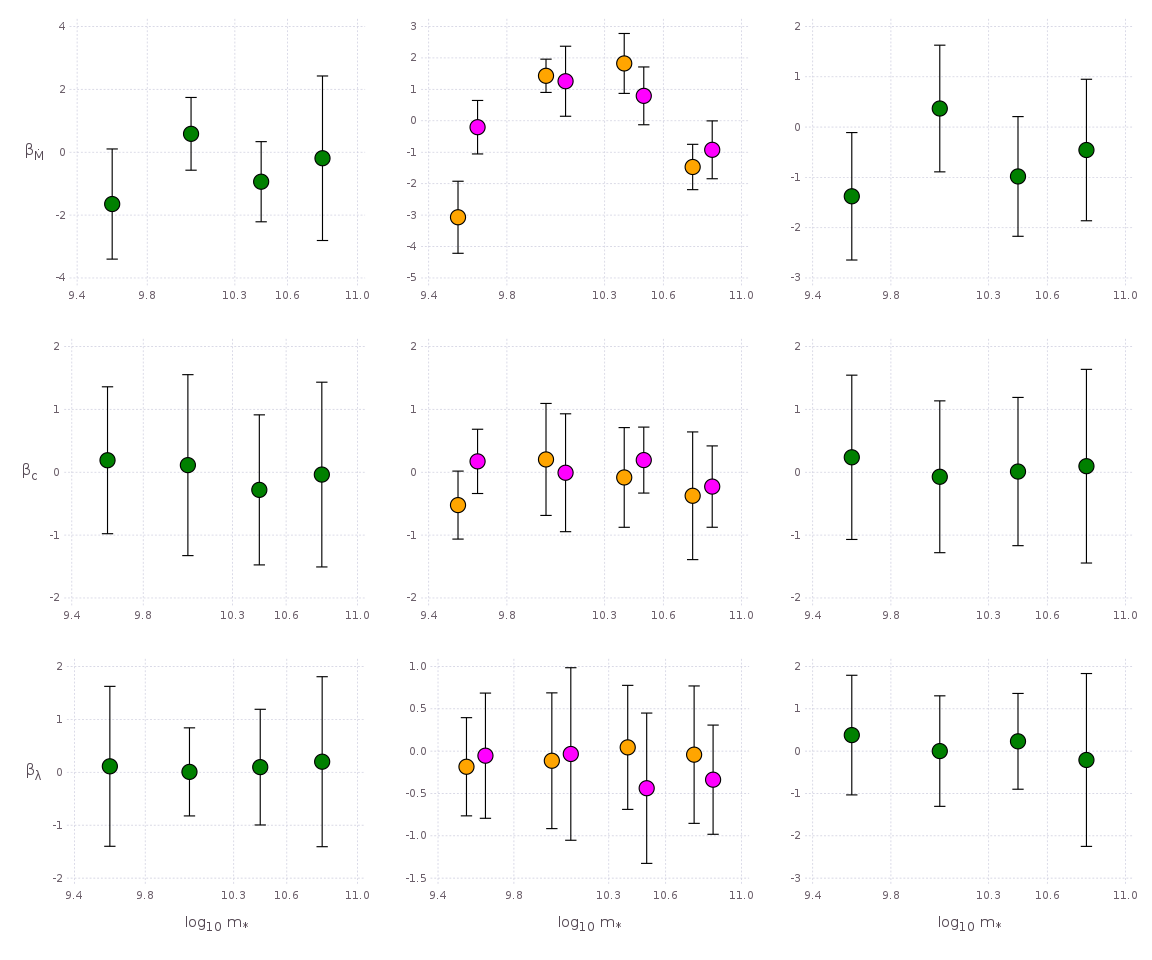

/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re_surf_vdisp/max_init/


In [894]:
parplot = all_param_plot(3)

draw(SVG("finfigs/all_param_plot_vdisp.svg", 12inch, 10inch), parplot)
draw(PDF("finfigs/all_param_plot_vdisp.pdf", 12inch, 10inch), parplot)
draw(PNG("finfigs/all_param_plot_vdisp.png", 12inch, 10inch), parplot)
display("image/png", read("finfigs/all_param_plot_vdisp.png"))

In [1071]:
sample_num = 4
var_config = 7
chain_range = 75:100
chain_range = 30:55
#chain_range = 9:13
#chain_range = 70:95
#chain_range = 50:75
# example using the M18 sample velocity dispersion
#chain, likevals = get_chain_likevals(1, 1, 75:100, subdir = "optim_run")
#chain, likevals = get_chain_likevals(sample_num, var_config, chain_range, subdir = "alt_init")
chain, likevals = get_chain_likevals(sample_num, var_config, chain_range, subdir = "max_init")
#chain, likevals = get_chain_likevals(sample_num, var_config, chain_range)

/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re_surf_vdisp/max_init/


([-24.733 -8.16676 … -25.6764 -29.3648; 7.62796 0.0580786 … 9.68091 10.9287; … ; 3.88694 0.807544 … -0.302094 1.22582; -2.22249 -1.94663 … -1.41394 -3.92176], [-8.11911e6, -8.11911e6, -8.11911e6, -8.11911e6, -8.1191e6, -8.1191e6, -8.11911e6, -8.11911e6, -8.11911e6, -8.11911e6  …  -8.11911e6, -8.1191e6, -8.1191e6, -8.1191e6, -8.1191e6, -8.11911e6, -8.1191e6, -8.1191e6, -8.11911e6, -8.11911e6])

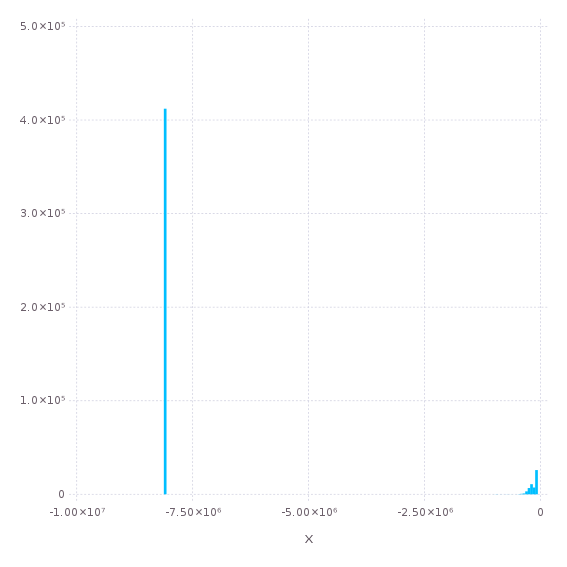

In [1072]:
#likevalmask = -4e5 .< likevals .< -3.8e5
likevalmask = likevals .> -3e8
set_default_plot_size(15cm, 15cm)
plot(x = likevals[likevalmask], Geom.histogram)

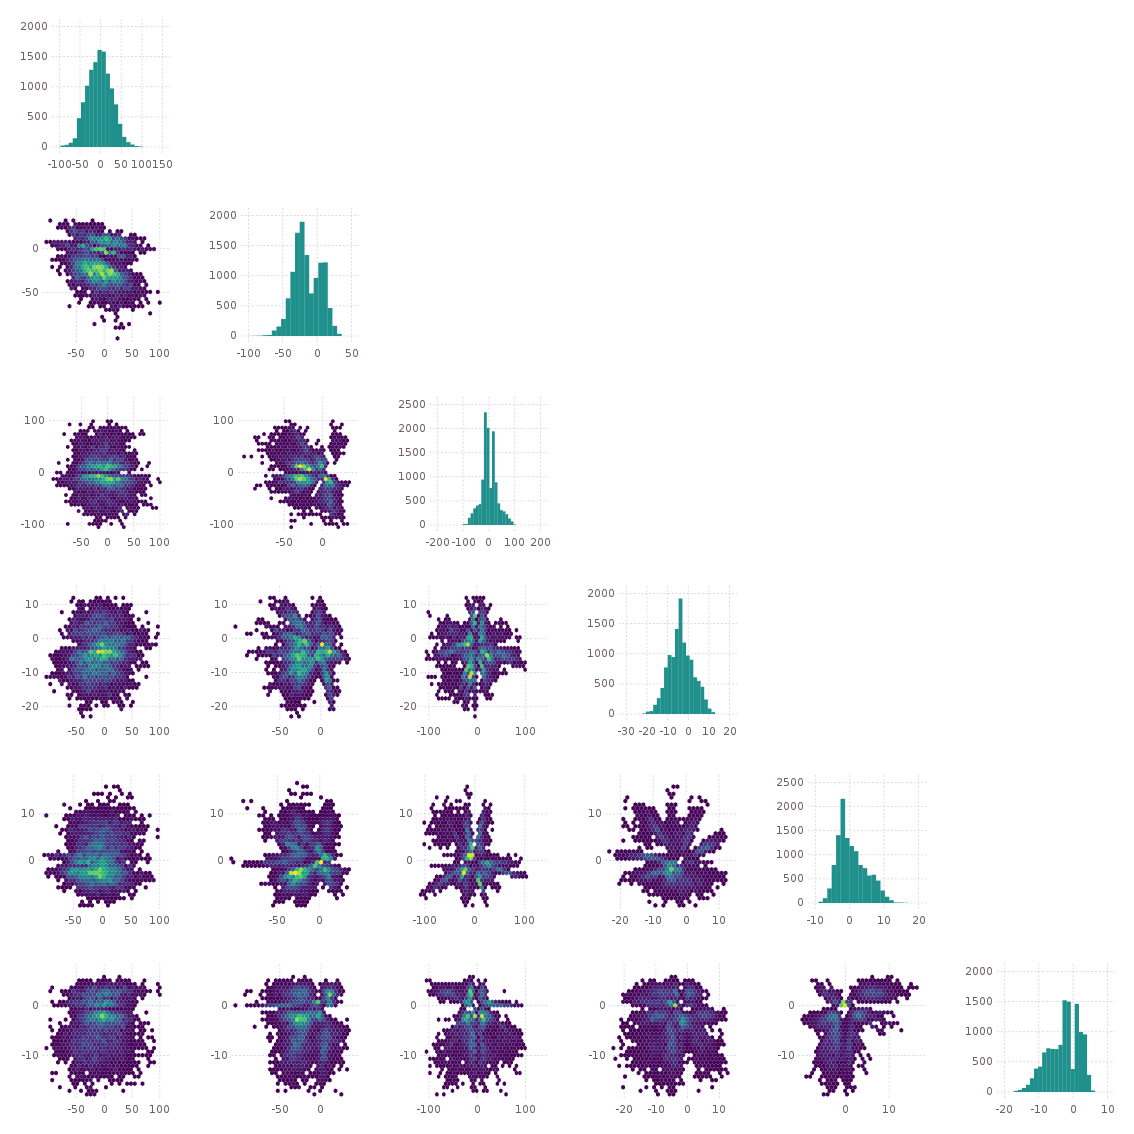

In [976]:
figsize = 30cm
fig2 = corner(chain[1:6, likevalmask]',
#fig2 = corner(chain[6:end, likevalmask]',
              #range=[(-40.0, -30.0), (4.5, 6.0), (-0.225, -0.15), (-1.65, -1.45), (-0.22, -0.18), (0.32, 0.35)],
              #varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
              plotsize=figsize)
draw(PNG("finfigs/fig2.png", figsize, figsize), fig2)
display("image/png", read("finfigs/fig2.png"))

In [979]:
# see what the mock looks like
minmass = 9.4
maxmass = 9.8
datdf, vol = get_dat(sample_num)
datdf = datdf[minmass .<= datdf[:log10M] .< maxmass, :]
means = get_means(sample_num, datdf)
mockdf = get_mock(sample_num, means...)
mockdf = mockdf[minmass .<= mockdf[:log10M] .< maxmass, :]
1

1

In [1013]:
const (meanvars, varswitch,
       rbins, sbins, vbins,
       mockdfarr,
       obsdat, nonzmask, obsums, volfac) = prepare_dat(sample_num,
                                                       var_config)

anon_bincounts = pars -> gen_mod_bincounts(pars, mockdfarr, varswitch,
                                           rbins, sbins, vbins)

(::#8456) (generic function with 1 method)

In [1010]:
# get a random set of parameters
pars = chain[:, likevalmask][:, rand(1:end)]
gen_obs(pars, [[mockdf]], get_vars(var_config))

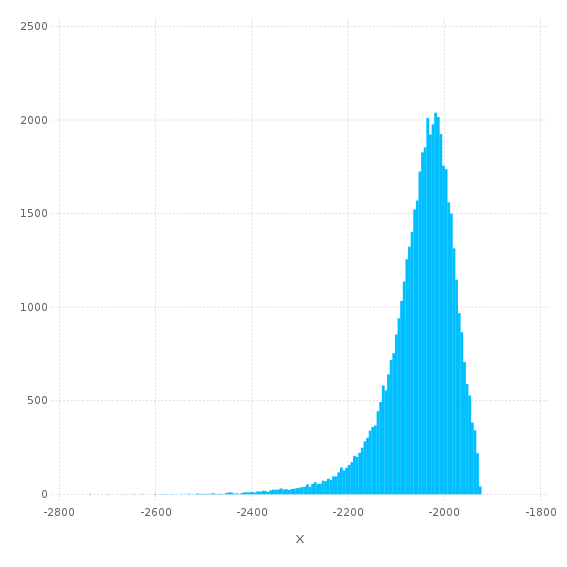

In [1011]:
plot(x = mockdf[:logv], Geom.histogram)

In [1014]:
pars = chain[:, likevalmask][:, rand(1:end)]
mockhist = anon_bincounts(pars)

160-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [1015]:
sum(mockhist)

0

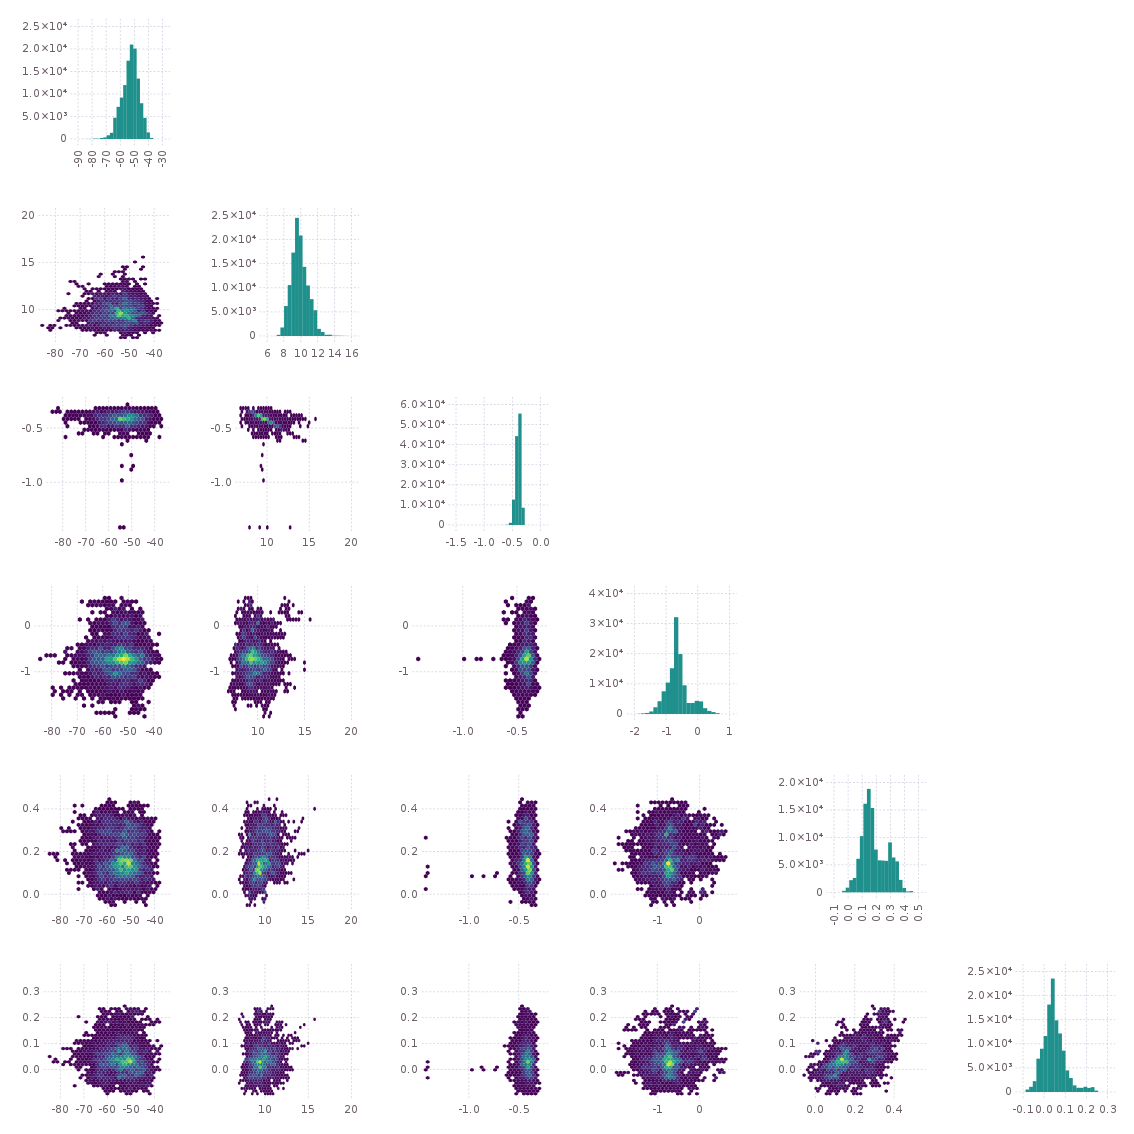

In [920]:
figsize = 30cm
fig2 = corner(chain[1:6, likevalmask]',
#fig2 = corner(chain[6:end, likevalmask]',
              #range=[(-40.0, -30.0), (4.5, 6.0), (-0.225, -0.15), (-1.65, -1.45), (-0.22, -0.18), (0.32, 0.35)],
              #varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
              plotsize=figsize)
draw(PNG("finfigs/fig2.png", figsize, figsize), fig2)
display("image/png", read("finfigs/fig2.png"))

In [847]:
println(join([mean(chain[i, :]) for i in 1:6], "  "))
println(join([mean(chain[i, likevals .> -1e5]) for i in 1:6], "  "))

-34.47278973887054  6.1973144552599715  0.6759971749954631  -1.3457780975252251  0.23877647171032854  0.3139437064719352
-37.35142185819083  6.424182469694471  -0.2595516133727075  -1.4592713514511728  0.14975016558201784  0.3596224120409744


In [865]:
cutoffs = [-1e5, -2e6, -6e6, -3e6]
for i in 1:4
    for j in [1, 2, 4]
        
        try
           altchain, altlikevals = get_chain_likevals(i, j, 75:100, subdir = "alt_init")
        catch BoundsError
            continue
        end
        chain, likevals = get_chain_likevals(i, j, 75:100, subdir = "max_init_oldpost")
        
        println(i, " ", j)
        #nocutmean = [mean(chain[k, :]) for k in 1:6]
        #nocutvar = [var(chain[k, :]) for k in 1:6]
        cutmean = [mean(chain[k, likevals .> cutoffs[i]]) for k in 1:6]
        cutvar = [var(chain[k, likevals .> cutoffs[i]]) for k in 1:6]
        altcutmean = [mean(altchain[k, altlikevals .> cutoffs[i]]) for k in 1:6]
        altcutvar = [var(altchain[k, altlikevals .> cutoffs[i]]) for k in 1:6]
        
        println("means")
#        println(join(nocutmean, "  "))
#        println(join(cutmean, "  "))
#        println(" ")
#        println("difference")
#        println(join(abs.(nocutmean .- cutmean), "  "))
        
        #println("avg % diff: ", 100 * mean(abs.((nocutmean .- cutmean) ./ cutmean)))
        println("avg % diff: ", 100 * mean(abs.((altcutmean .- cutmean) ./ cutmean)))
        
        println("vars")
#        println(join(nocutvar, "  "))
#        println(join(cutvar, "  "))
#        println(" ")
#        println("difference")
#        println(join(abs.(nocutvar .- cutvar), "  "))
        
        #println("avg % diff: ", 100 * mean(abs.((nocutvar .- cutvar) ./ cutvar)))
        println("avg % diff: ", 100 * mean(abs.((altcutvar .- cutvar) ./ cutvar)))
        
        println(" ")
        println("  ### ### ### ### ### ### ### ### ### ### ### ### ###")
        println(" ")
    end
end

/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/vdisp/alt_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/vdisp/max_init_oldpost/
1 1
means
avg % diff: 9.393023185880141
vars
avg % diff: 162.4207565141876
 
  ### ### ### ### ### ### ### ### ### ### ### ### ###
 
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/surf/alt_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/surf/max_init_oldpost/
1 2
means
avg % diff: 28.29451786964962
vars
avg % diff: 39.511729118943315
 
  ### ### ### ### ### ### ### ### ### ### ### ### ###
 
/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re/alt_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/vdisp/alt_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/vdisp/max_init_oldpost/
2 1
means
avg % diff: 4.678612248306049
vars
avg % diff: 73.98391255078306
 
  ### ### ### ### ### ### ### ### ### ### ### ### ###
 
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/surf/alt_init/
/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/surf/max_init_oldpost/

In [708]:
maxpars = chain[:, likevalmask][:, find(maximum(likevals[likevalmask]))[1]]

6-element Array{Float64,1}:
 -55.4239    
   9.12777   
  -0.359159  
  -0.525586  
  -0.00492684
   0.14078   

In [705]:
maxpars = chain[:, likevalmask][:, find(maximum(likevals[likevalmask]))[1]]

18-element Array{Float64,1}:
 -55.0359    
   9.068     
  -0.385613  
  -0.518937  
  -0.0260478 
   0.145449  
 -55.9322    
  10.1529    
  -0.393553  
  -0.959014  
  -0.315327  
  -0.321591  
 -23.4092    
   3.01151   
  -0.0742607 
  -1.46629   
  -0.237813  
   0.00997105

In [ ]:
th, varstr = get_thres_varstring(sample_num, var_config)
writedlm(string("../dat/mcmc/M", th, "/", varstring, ".alt"), maxpars)

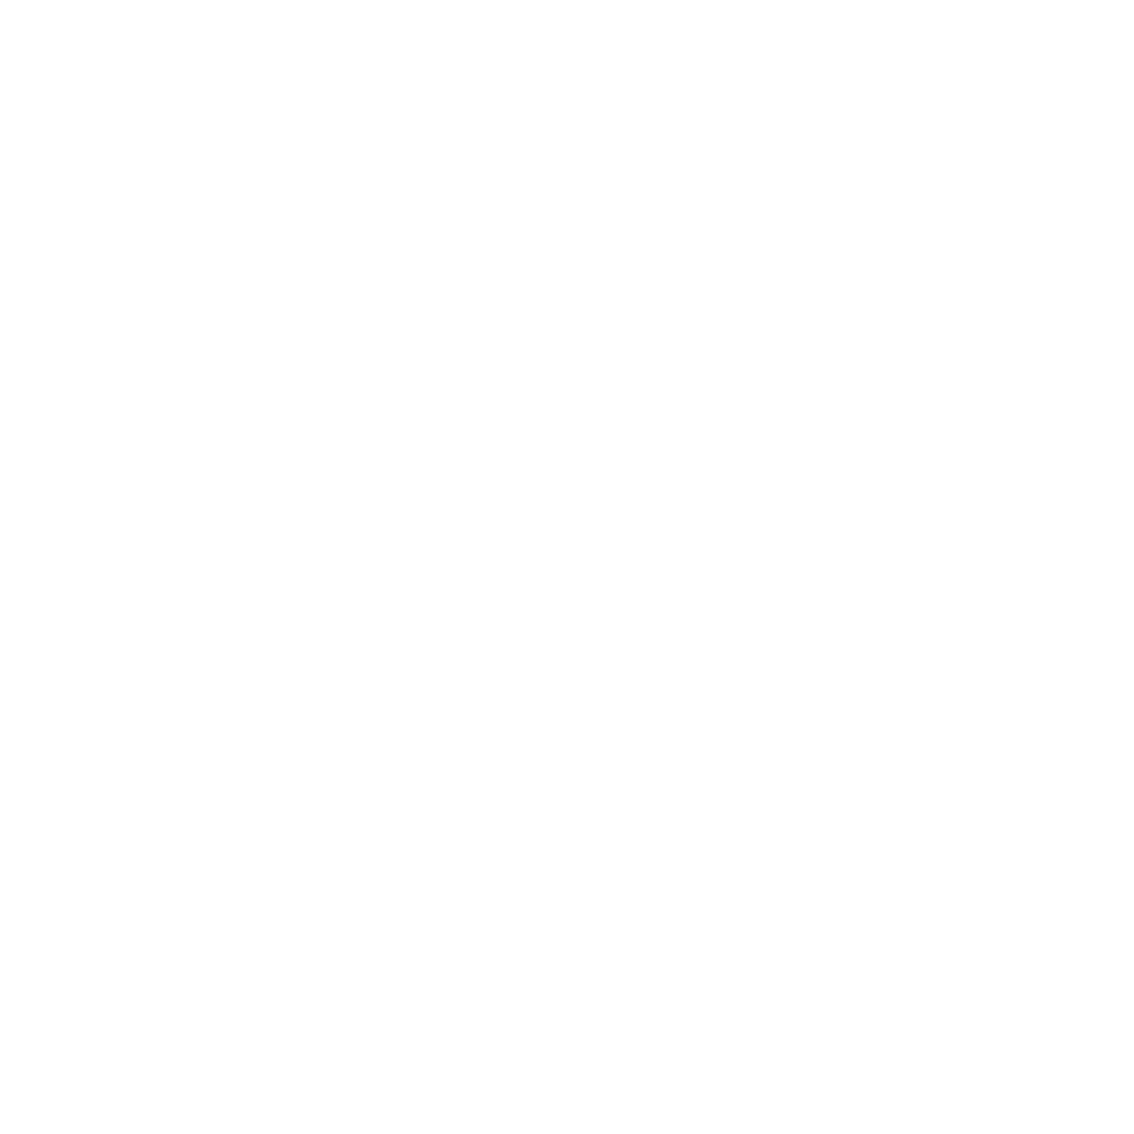

In [870]:
# M18 R_e posteriors
fig1 = corner(chain[7:end, likevalmask]',
              #range=[(-20.0, 15.0), (-3.0, 3.0), (-0.1, 0.2), (-6.0, 2.0), (-1.0, 0.0), (-0.5, 0.5)],
              #varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
              plotsize=30cm)

# M18 surf posteriors
#corner(chain',
#       #range=[(-35.0, 20.0), (0.0, 8.0), (-0.3, 0.1), (-2.5, 1.5), (-0.5, 0.5), (-0.3, 0.5)],
#       varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
#       plotsize=30cm)

# M18 vdisp posteriors
#corner(chain',
#       range=[(-18.0, 14.0), (-5.0, 5.0), (-0.15, 0.15), (-2.5, 0.5), (-0.2, 0.6), (0.2, 0.6)],
#       varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
#       plotsize=30cm)

# M19 R_e
#corner(chain',
#       range=[(-30.0, -15.0), (1.0, 3.0), (-0.1, -0.03), (1.0, 2.0), (0.0, 0.3), (0.0, 0.15)],
#       varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
#       plotsize=30cm)

# M19 surf
#corner(chain',
#       #range=[(-56.0, -46.0), (8.5, 10.2), (-10.5, -6.5), (1.15, 1.45), (-0.12, 0.02), (-0.06, 0.01)],
#       range=[(-56.0, -46.0), (8.5, 10.2), (-0.5, -0.3), (1.2, 1.4), (-0.5, 0.5), (-0.2, 0.4)],
#       varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
#       plotsize=30cm)

# M19 vdisp
#corner(chain',
#       range=[(-20.0, 12.0), (2.0, 3.5), (-0.12, -0.08), (0.25, 0.75), (-0.05, 0.05), (-0.2, 0.2)],
#       varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
#       plotsize=30cm)

# M20a R_e
#corner(chain',
#       range=[(-66.0, -64.0), (9.6, 10.0), (-0.39, -0.375), (1.4, 1.6), (-0.1, 0.15), (0.14, 0.22)],
#       varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
#       plotsize=30cm)

# M20a surf
#corner(chain',
#       range=[(-65.0, -50.0), (9.0, 12.0), (-0.45, -0.37), (0.2, 1.2), (-0.0, 0.2), (-0.5, -0.45)],
#       varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
#       plotsize=30cm)

# M20a vdisp
#TODO possibly narrow these ranges a little more...
#corner(chain',
#       range=[(-50.0, 25.0), (-5.0, 10.0), (-10.0, 10.0), (-2.0, 2.0), (-0.2, 0.2), (-3.0, 0.5)],
#       varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
#       plotsize=30cm)

# M20b R_e
#TODO possibly narrow these ranges a little more...
#corner(chain',
#       range=[(-40.0, 10.0), (-5.0, 7.5), (-0.24, -0.16), (-4.0, 2.0), (-0.5, 0.5), (-1.0, 1.0)],
#       varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
#       plotsize=30cm)

# M20b surf
#corner(chain',
#       range=[(-80.0, 20.0), (5.0, 15.0), (-0.6, -0.3), (-1.15, -0.5), (-0.4, -0.1), (-0.5, -0.15)],
#       varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
#       plotsize=30cm)

draw(PNG("finfigs/fig1.png", figsize, figsize), fig1)
display("image/png", read("finfigs/fig1.png"))

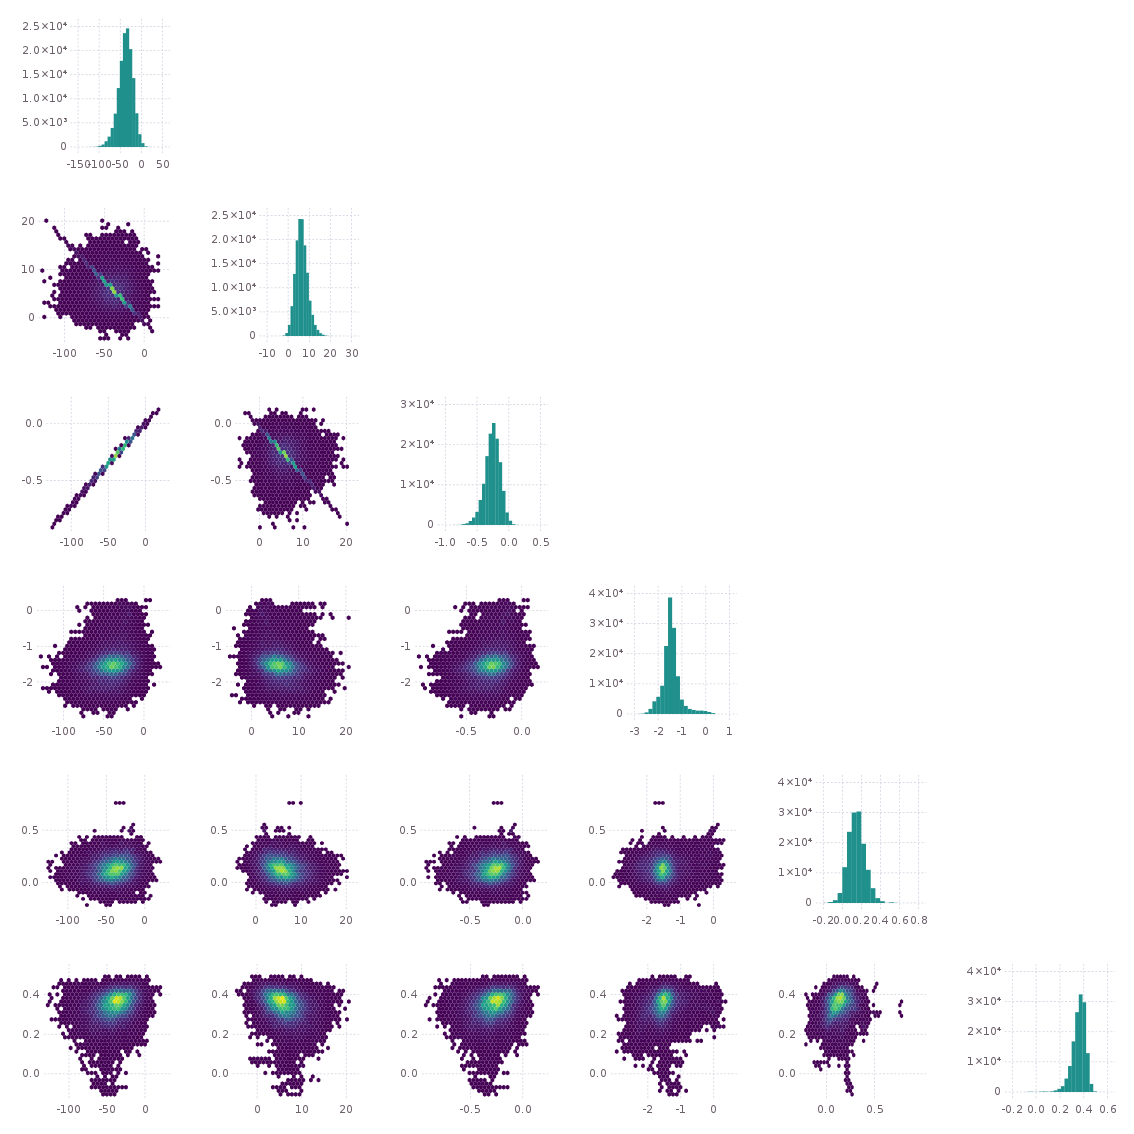

In [878]:
figsize = 30cm
fig2 = corner(chain[1:end, likevalmask]',
              #range=[(-40.0, -30.0), (4.5, 6.0), (-0.225, -0.15), (-1.65, -1.45), (-0.22, -0.18), (0.32, 0.35)],
              #varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
              plotsize=figsize)
draw(PNG("finfigs/fig2.png", figsize, figsize), fig2)
display("image/png", read("finfigs/fig2.png"))

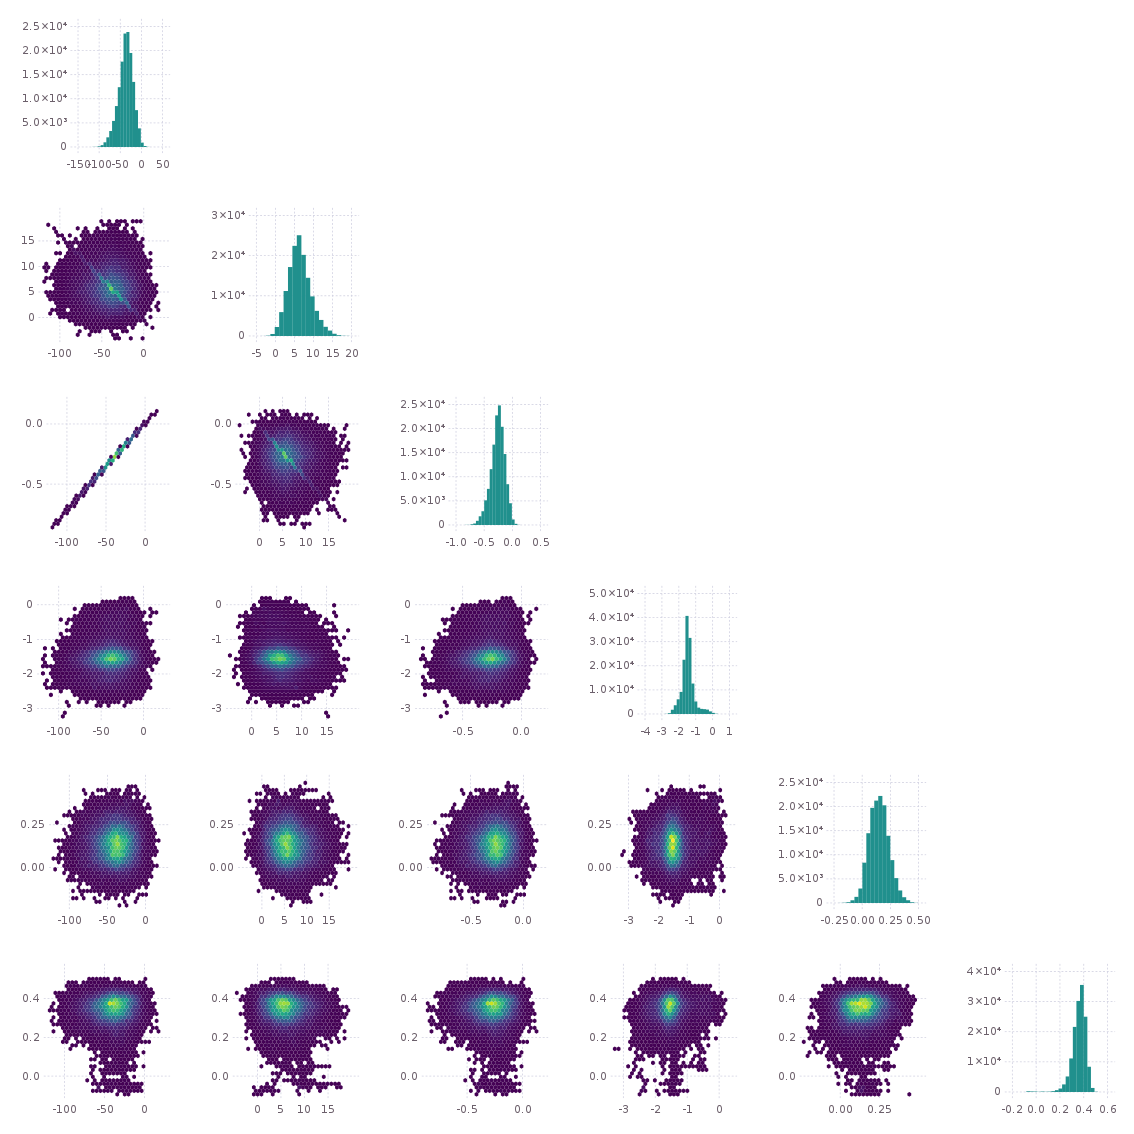

In [890]:
figsize = 30cm
fig2 = corner(chain[1:end, likevalmask]',
              #range=[(-40.0, -30.0), (4.5, 6.0), (-0.225, -0.15), (-1.65, -1.45), (-0.22, -0.18), (0.32, 0.35)],
              #varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
              plotsize=figsize)
draw(PNG("finfigs/fig2.png", figsize, figsize), fig2)
display("image/png", read("finfigs/fig2.png"))

In [45]:
function logprior(params, meanvars, varswitch)

    means = zeros(params)
    invvar = 0.04  # assume standard deviation of 5

    nvars = sum(varswitch)  # number of data variables
    logfac = -0.5 * log(2π * 25.0^(nvars * 6))

    for i in 1:nvars
        means[(6 * (i - 1) + 1)] = meanvars[Bool.(varswitch)][i]
    end

    return logfac - 0.5 * sum(invvar * (params .- means) .^ 2)

end


logprior (generic function with 1 method)

In [52]:
testpars = [50.6, 0, 100, 10, 0, 0, 21.2, 0, 0, 0, 0, 0]
logprior(testpars, [5.6, -3.2, 7.0], [1, 0, 1])

-266.7649934824139

In [166]:
chain[:, find(likevals .== maximum(likevals))[1]]

6-element Array{Float64,1}:
 -0.353154 
 -0.683776 
  0.0456234
 -3.8753   
 -0.487858 
  0.0785862

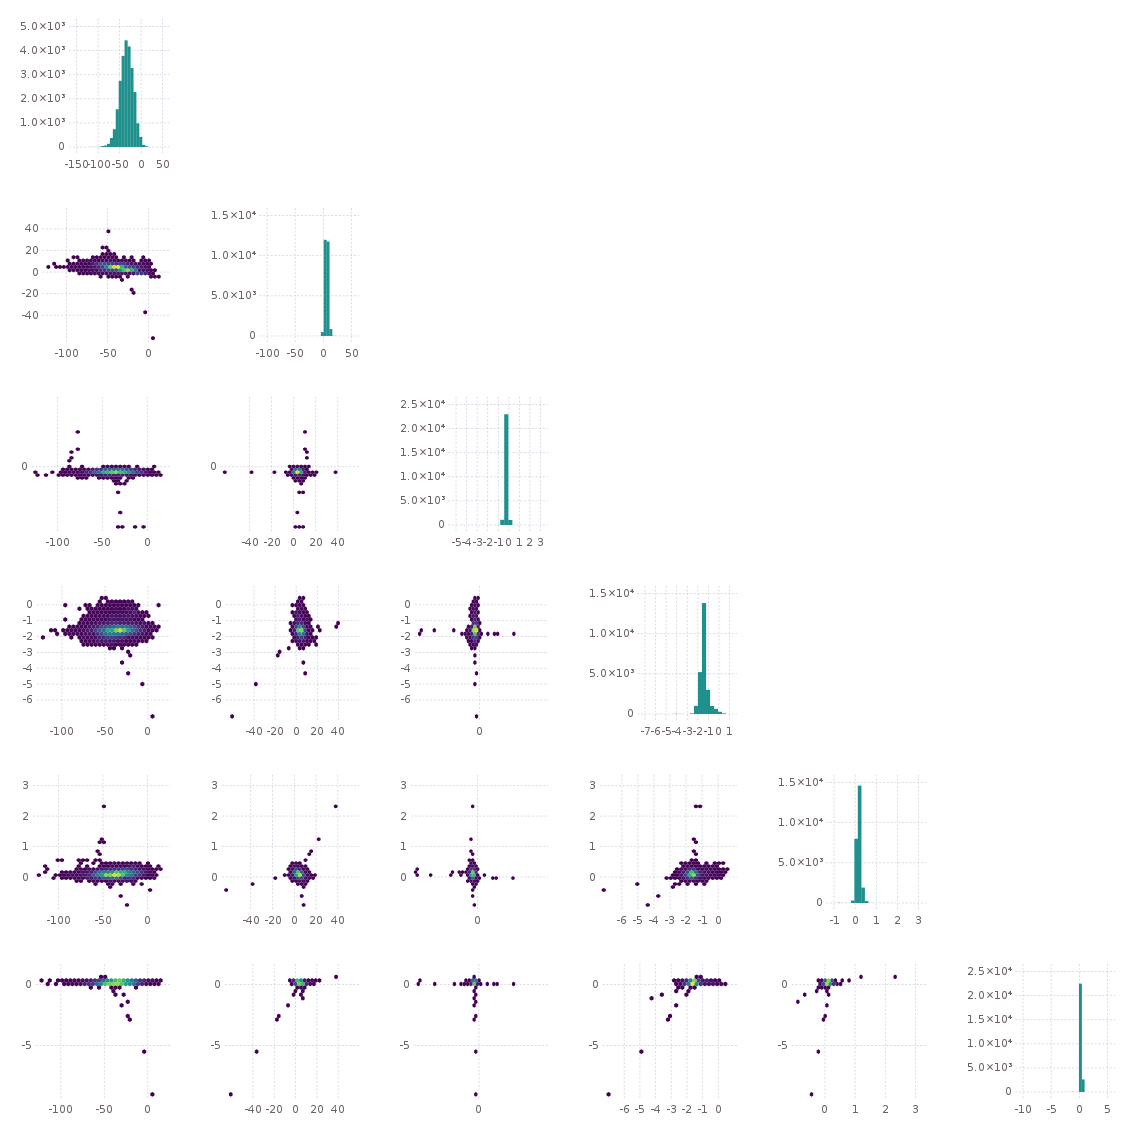

In [269]:
figsize = 30cm
fig1 = corner(chain[:, likevalmask]',
              #range=[(-40.0, -30.0), (4.5, 6.0), (-0.225, -0.15), (-1.65, -1.45), (-0.22, -0.18), (0.32, 0.35)],
              #varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
              plotsize=figsize)
draw(PNG("finfigs/fig1.png", figsize, figsize), fig1)
display("image/png", read("finfigs/fig1.png"))

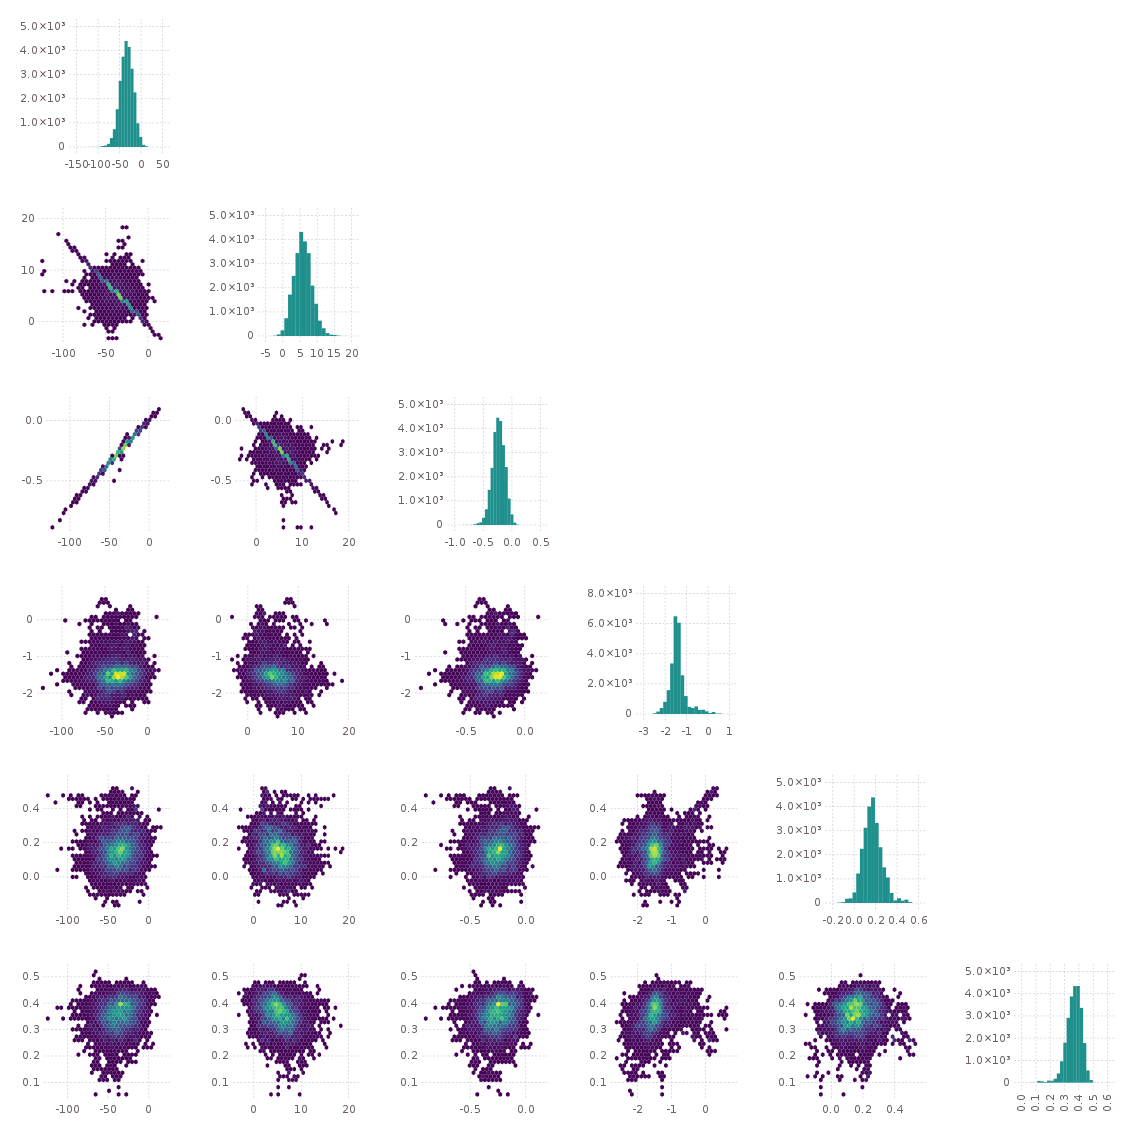

In [271]:
figsize = 30cm
fig2 = corner(chain[:, likevalmask]',
              #range=[(-40.0, -30.0), (4.5, 6.0), (-0.225, -0.15), (-1.65, -1.45), (-0.22, -0.18), (0.32, 0.35)],
              #varnames = ["β₀", "βm", "βm²", "βṁ", "βc", "βλ"],
              plotsize=figsize)
draw(PNG("finfigs/fig2.png", figsize, figsize), fig2)
display("image/png", read("finfigs/fig2.png"))

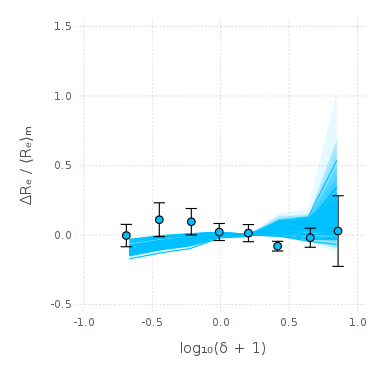

/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re/max_init/


In [879]:
repost = post_draw_ribbons(1, 4, ndraws = 100, like_cutoff = -1e3, subdir = "max_init", chain_range = 30:55)

draw(SVG("finfigs/postribbons_M18_Re.svg", 4inch, 4inch), repost)
draw(PDF("finfigs/postribbons_M18_Re.pdf", 4inch, 4inch), repost)
draw(PNG("finfigs/postribbons_M18_Re.png", 4inch, 4inch), repost)
display("image/png", read("finfigs/postribbons_M18_Re.png"))

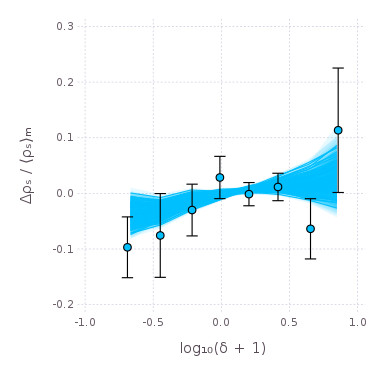

/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/surf/optim_run/


In [539]:
surfpost = post_draw_ribbons(1, 2, ndraws = 100, like_cutoff = -5e3, subdir = "optim_run")

draw(SVG("finfigs/postribbons_M18_surf.svg", 4inch, 4inch), surfpost)
draw(PDF("finfigs/postribbons_M18_surf.pdf", 4inch, 4inch), surfpost)
draw(PNG("finfigs/postribbons_M18_surf.png", 4inch, 4inch), surfpost)
display("image/png", read("finfigs/postribbons_M18_surf.png"))

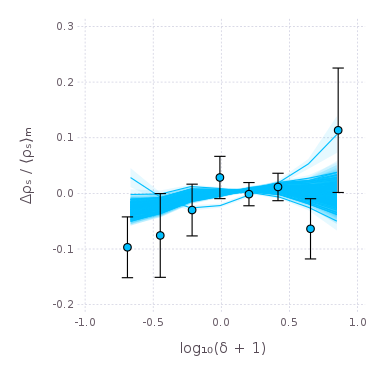

/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/surf/max_init/


In [540]:
surfpost = post_draw_ribbons(1, 2, ndraws = 100, like_cutoff = -5e3, subdir = "max_init")

draw(SVG("finfigs/postribbons_M18_surf.svg", 4inch, 4inch), surfpost)
draw(PDF("finfigs/postribbons_M18_surf.pdf", 4inch, 4inch), surfpost)
draw(PNG("finfigs/postribbons_M18_surf.png", 4inch, 4inch), surfpost)
display("image/png", read("finfigs/postribbons_M18_surf.png"))

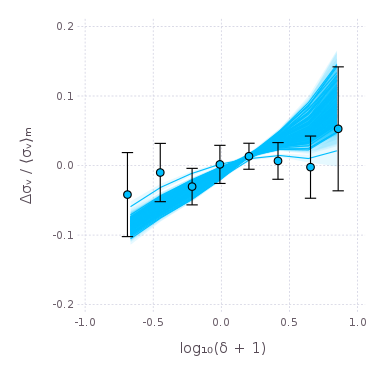

/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/vdisp/max_init/


In [882]:
vpost = post_draw_ribbons(1, 1, ndraws = 100, like_cutoff = -1e3, chain_range = 30:55, subdir = "max_init")

draw(SVG("finfigs/postribbons_M18_vdisp.svg", 4inch, 4inch), vpost)
draw(PDF("finfigs/postribbons_M18_vdisp.pdf", 4inch, 4inch), vpost)
draw(PNG("finfigs/postribbons_M18_vdisp.png", 4inch, 4inch), vpost)
display("image/png", read("finfigs/postribbons_M18_vdisp.png"))

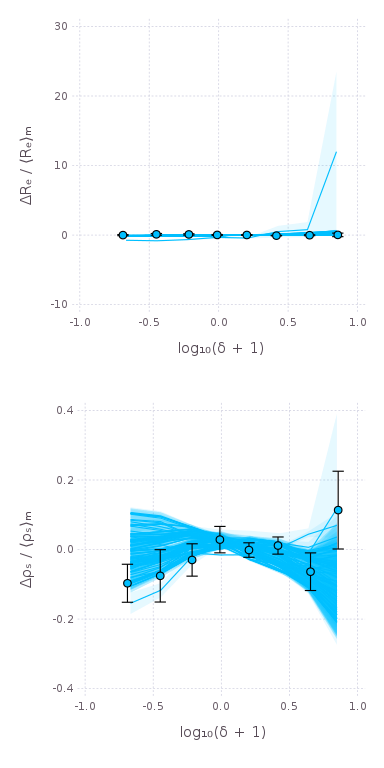

/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_surf/


In [206]:
re_s_post = post_draw_ribbons(1, 6, ndraws = 100, chain_range = 30:50, like_cutoff = -1.5e3)

draw(SVG("finfigs/postribbons_M18_re_surf.svg", 4inch, 8inch), re_s_post)
draw(PDF("finfigs/postribbons_M18_re_surf.pdf", 4inch, 8inch), re_s_post)
draw(PNG("finfigs/postribbons_M18_re_surf.png", 4inch, 8inch), re_s_post)
display("image/png", read("finfigs/postribbons_M18_re_surf.png"))

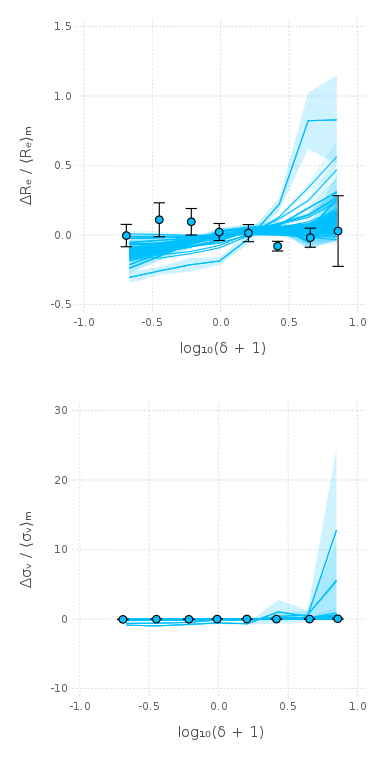

/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_vdisp/


In [221]:
re_v_post = post_draw_ribbons(1, 5, ndraws = 100, chain_range = 30:50, like_cutoff = -3e3)

draw(SVG("finfigs/postribbons_M18_re_vdisp.svg", 4inch, 8inch), re_v_post)
draw(PDF("finfigs/postribbons_M18_re_vdisp.pdf", 4inch, 8inch), re_v_post)
draw(PNG("finfigs/postribbons_M18_re_vdisp.png", 4inch, 8inch), re_v_post)
display("image/png", read("finfigs/postribbons_M18_re_vdisp.png"))

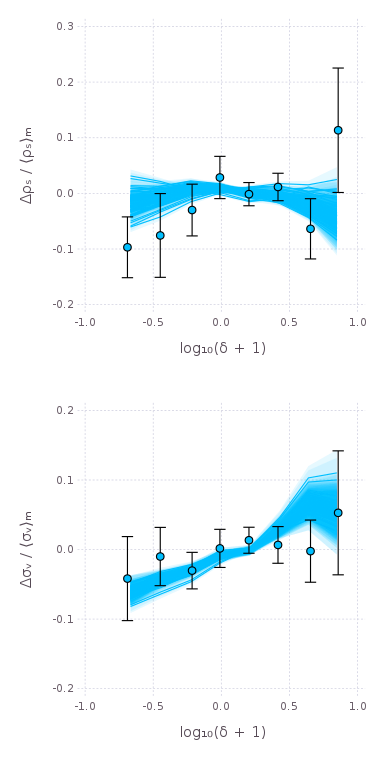

/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/surf_vdisp/


In [232]:
s_v_post = post_draw_ribbons(1, 3, ndraws = 100, chain_range = 30:50, like_cutoff = -1e3)

draw(SVG("finfigs/postribbons_M18_surf_vdisp.svg", 4inch, 8inch), s_v_post)
draw(PDF("finfigs/postribbons_M18_surf_vdisp.pdf", 4inch, 8inch), s_v_post)
draw(PNG("finfigs/postribbons_M18_surf_vdisp.png", 4inch, 8inch), s_v_post)
display("image/png", read("finfigs/postribbons_M18_surf_vdisp.png"))

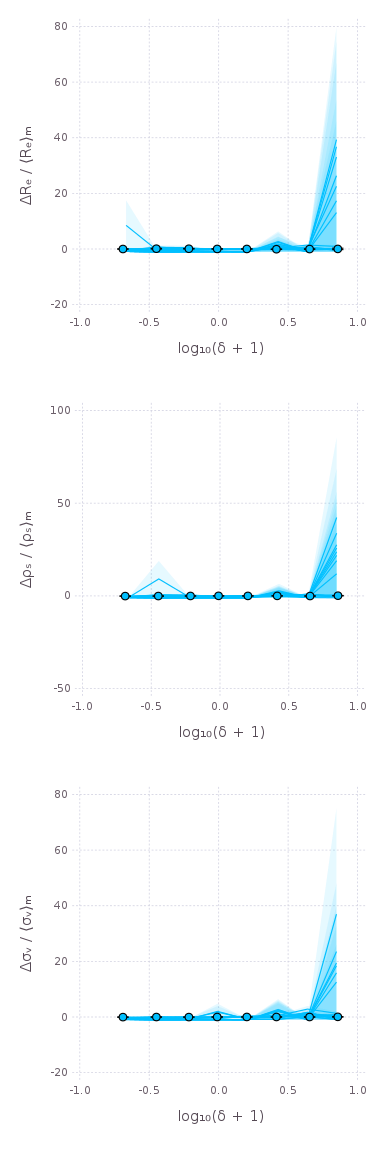

/home/users/kww231/dev/cenquenbias/dat/mcmc/M18/Re_surf_vdisp/


In [243]:
rsv_post = post_draw_ribbons(1, 7, ndraws = 20, chain_range = 8:14)

draw(SVG("finfigs/postribbons_M18_Re_surf_vdisp.svg", 4inch, 12inch), rsv_post)
draw(PDF("finfigs/postribbons_M18_Re_surf_vdisp.pdf", 4inch, 12inch), rsv_post)
draw(PNG("finfigs/postribbons_M18_Re_surf_vdisp.png", 4inch, 12inch), rsv_post)
display("image/png", read("finfigs/postribbons_M18_Re_surf_vdisp.png"))

In [200]:
repost = post_draw_ribbons(2, 4, ndraws = 100, like_cutoff = -700.0)

draw(SVG("finfigs/postribbons_M19_Re.svg", 4inch, 4inch), repost)
draw(PDF("finfigs/postribbons_M19_Re.pdf", 4inch, 4inch), repost)
draw(PNG("finfigs/postribbons_M19_Re.png", 4inch, 4inch), repost)
display("image/png", read("finfigs/postribbons_M19_Re.png"))

/home/users/kww231/dev/cenquenbias/dat/mcmc/M19/Re/


LoadError: [91mBoundsError: attempt to access "chain_range is not compatible with existing files"[39m

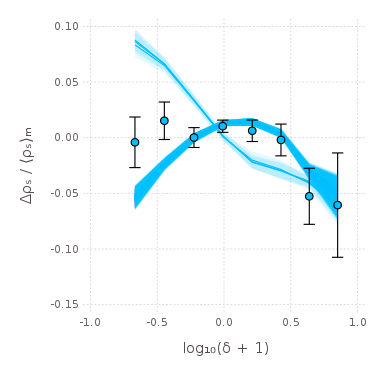

In [36]:
surfpost = post_draw_ribbons(2, 2, ndraws = 100, like_cutoff = -6e3)

draw(SVG("finfigs/postribbons_M19_surf.svg", 4inch, 4inch), surfpost)
draw(PDF("finfigs/postribbons_M19_surf.pdf", 4inch, 4inch), surfpost)
draw(PNG("finfigs/postribbons_M19_surf.png", 4inch, 4inch), surfpost)
display("image/png", read("finfigs/postribbons_M19_surf.png"))

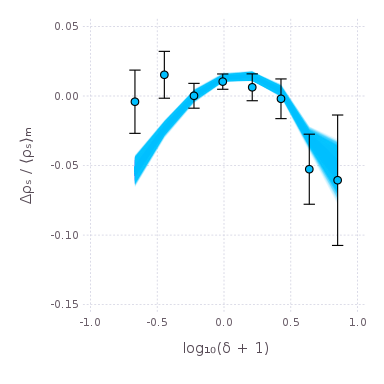

In [38]:
surfpost = post_draw_ribbons(2, 2, ndraws = 100, like_cutoff = -2e3)

draw(SVG("finfigs/postribbons_M19_surf.svg", 4inch, 4inch), surfpost)
draw(PDF("finfigs/postribbons_M19_surf.pdf", 4inch, 4inch), surfpost)
draw(PNG("finfigs/postribbons_M19_surf.png", 4inch, 4inch), surfpost)
display("image/png", read("finfigs/postribbons_M19_surf.png"))

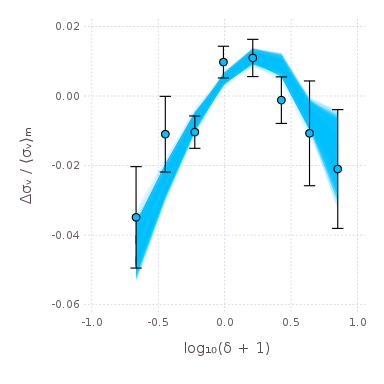

In [44]:
vpost = post_draw_ribbons(2, 1, ndraws = 100, like_cutoff = -5e2)

draw(SVG("finfigs/postribbons_M19_vdisp.svg", 4inch, 4inch), vpost)
draw(PDF("finfigs/postribbons_M19_vdisp.pdf", 4inch, 4inch), vpost)
draw(PNG("finfigs/postribbons_M19_vdisp.png", 4inch, 4inch), vpost)
display("image/png", read("finfigs/postribbons_M19_vdisp.png"))

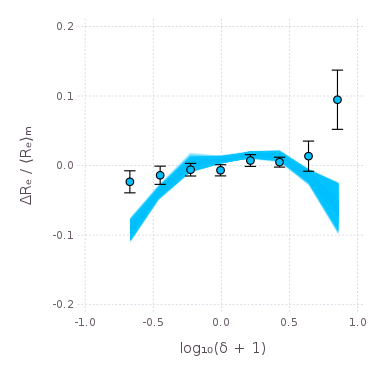

In [51]:
repost = post_draw_ribbons(3, 4, ndraws = 100, like_cutoff = -4.7e3)

draw(SVG("finfigs/postribbons_M20a_Re.svg", 4inch, 4inch), repost)
draw(PDF("finfigs/postribbons_M20a_Re.pdf", 4inch, 4inch), repost)
draw(PNG("finfigs/postribbons_M20a_Re.png", 4inch, 4inch), repost)
display("image/png", read("finfigs/postribbons_M20a_Re.png"))

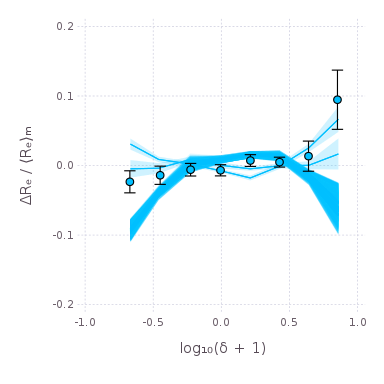

In [53]:
repost = post_draw_ribbons(3, 4, ndraws = 100, like_cutoff = -7e3)

draw(SVG("finfigs/postribbons_M20a_Re.svg", 4inch, 4inch), repost)
draw(PDF("finfigs/postribbons_M20a_Re.pdf", 4inch, 4inch), repost)
draw(PNG("finfigs/postribbons_M20a_Re.png", 4inch, 4inch), repost)
display("image/png", read("finfigs/postribbons_M20a_Re.png"))

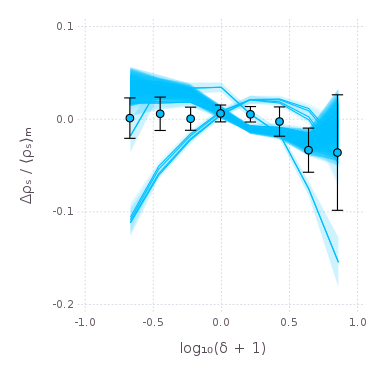

In [57]:
surfpost = post_draw_ribbons(3, 2, ndraws = 100, like_cutoff = -5e3)

draw(SVG("finfigs/postribbons_M20a_surf.svg", 4inch, 4inch), surfpost)
draw(PDF("finfigs/postribbons_M20a_surf.pdf", 4inch, 4inch), surfpost)
draw(PNG("finfigs/postribbons_M20a_surf.png", 4inch, 4inch), surfpost)
display("image/png", read("finfigs/postribbons_M20a_surf.png"))

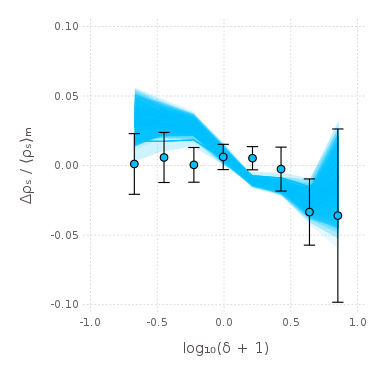

In [59]:
surfpost = post_draw_ribbons(3, 2, ndraws = 100, like_cutoff = -4.3e3)

draw(SVG("finfigs/postribbons_M20a_surf.svg", 4inch, 4inch), surfpost)
draw(PDF("finfigs/postribbons_M20a_surf.pdf", 4inch, 4inch), surfpost)
draw(PNG("finfigs/postribbons_M20a_surf.png", 4inch, 4inch), surfpost)
display("image/png", read("finfigs/postribbons_M20a_surf.png"))

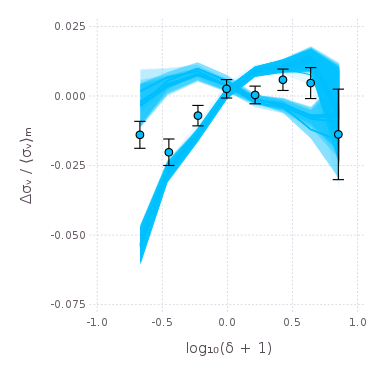

In [63]:
vpost = post_draw_ribbons(3, 1, ndraws = 100, like_cutoff = -5e3)

draw(SVG("finfigs/postribbons_M20a_vdisp.svg", 4inch, 4inch), vpost)
draw(PDF("finfigs/postribbons_M20a_vdisp.pdf", 4inch, 4inch), vpost)
draw(PNG("finfigs/postribbons_M20a_vdisp.png", 4inch, 4inch), vpost)
display("image/png", read("finfigs/postribbons_M20a_vdisp.png"))

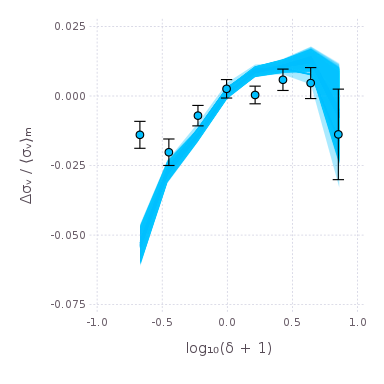

In [64]:
vpost = post_draw_ribbons(3, 1, ndraws = 100, like_cutoff = -4.8e3)

draw(SVG("finfigs/postribbons_M20a_vdisp.svg", 4inch, 4inch), vpost)
draw(PDF("finfigs/postribbons_M20a_vdisp.pdf", 4inch, 4inch), vpost)
draw(PNG("finfigs/postribbons_M20a_vdisp.png", 4inch, 4inch), vpost)
display("image/png", read("finfigs/postribbons_M20a_vdisp.png"))

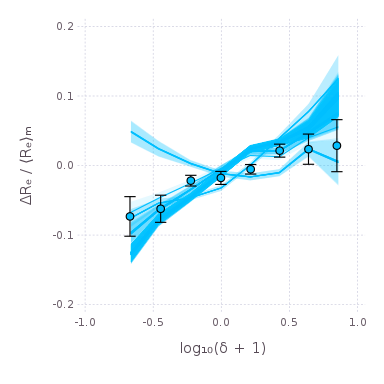

In [75]:
repost = post_draw_ribbons(4, 4, ndraws = 100, like_cutoff = -4.7e3)

draw(SVG("finfigs/postribbons_M20b_Re.svg", 4inch, 4inch), repost)
draw(PDF("finfigs/postribbons_M20b_Re.pdf", 4inch, 4inch), repost)
draw(PNG("finfigs/postribbons_M20b_Re.png", 4inch, 4inch), repost)
display("image/png", read("finfigs/postribbons_M20b_Re.png"))

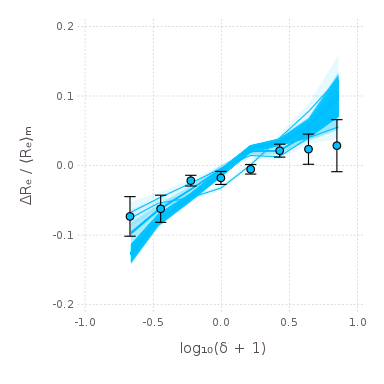

In [77]:
repost = post_draw_ribbons(4, 4, ndraws = 100, like_cutoff = -4e3)

draw(SVG("finfigs/postribbons_M20b_Re.svg", 4inch, 4inch), repost)
draw(PDF("finfigs/postribbons_M20b_Re.pdf", 4inch, 4inch), repost)
draw(PNG("finfigs/postribbons_M20b_Re.png", 4inch, 4inch), repost)
display("image/png", read("finfigs/postribbons_M20b_Re.png"))

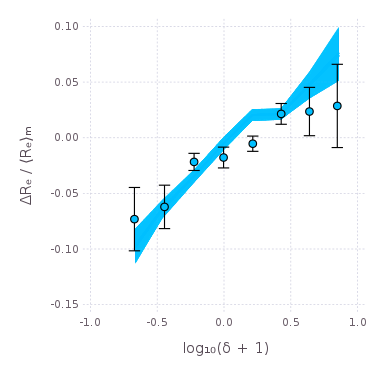

In [79]:
repost = post_draw_ribbons(4, 4, ndraws = 100, like_cutoff = -3.15e3)

draw(SVG("finfigs/postribbons_M20b_Re.svg", 4inch, 4inch), repost)
draw(PDF("finfigs/postribbons_M20b_Re.pdf", 4inch, 4inch), repost)
draw(PNG("finfigs/postribbons_M20b_Re.png", 4inch, 4inch), repost)
display("image/png", read("finfigs/postribbons_M20b_Re.png"))

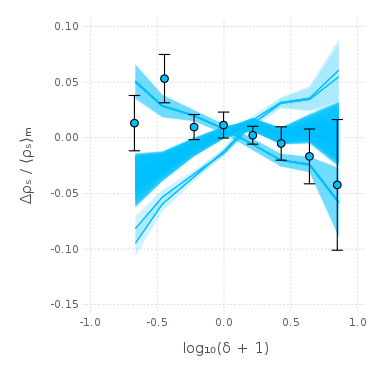

In [98]:
surfpost = post_draw_ribbons(4, 2, ndraws = 100, like_cutoff = -3e3)

draw(SVG("finfigs/postribbons_M20b_surf.svg", 4inch, 4inch), surfpost)
draw(PDF("finfigs/postribbons_M20b_surf.pdf", 4inch, 4inch), surfpost)
draw(PNG("finfigs/postribbons_M20b_surf.png", 4inch, 4inch), surfpost)
display("image/png", read("finfigs/postribbons_M20b_surf.png"))

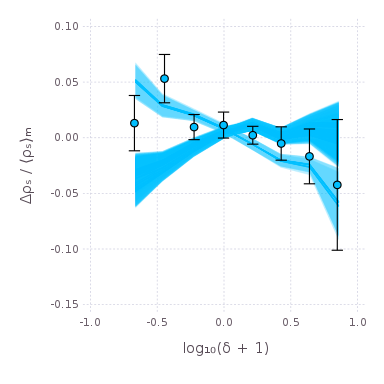

In [99]:
surfpost = post_draw_ribbons(4, 2, ndraws = 100, like_cutoff = -2.5e3)

draw(SVG("finfigs/postribbons_M20b_surf.svg", 4inch, 4inch), surfpost)
draw(PDF("finfigs/postribbons_M20b_surf.pdf", 4inch, 4inch), surfpost)
draw(PNG("finfigs/postribbons_M20b_surf.png", 4inch, 4inch), surfpost)
display("image/png", read("finfigs/postribbons_M20b_surf.png"))

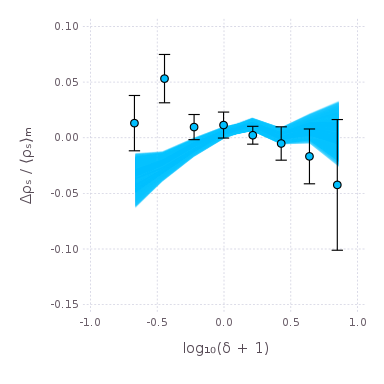

In [100]:
surfpost = post_draw_ribbons(4, 2, ndraws = 100, like_cutoff = -2.4e3)

draw(SVG("finfigs/postribbons_M20b_surf.svg", 4inch, 4inch), surfpost)
draw(PDF("finfigs/postribbons_M20b_surf.pdf", 4inch, 4inch), surfpost)
draw(PNG("finfigs/postribbons_M20b_surf.png", 4inch, 4inch), surfpost)
display("image/png", read("finfigs/postribbons_M20b_surf.png"))

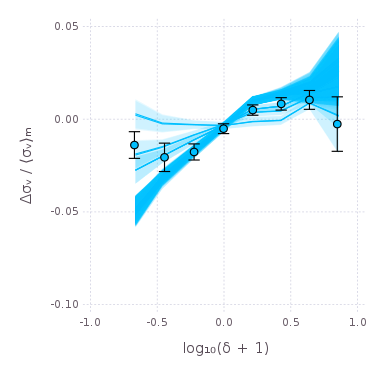

In [108]:
vpost = post_draw_ribbons(4, 1, ndraws = 100, like_cutoff = -5e3)

draw(SVG("finfigs/postribbons_M20b_vdisp.svg", 4inch, 4inch), vpost)
draw(PDF("finfigs/postribbons_M20b_vdisp.pdf", 4inch, 4inch), vpost)
draw(PNG("finfigs/postribbons_M20b_vdisp.png", 4inch, 4inch), vpost)
display("image/png", read("finfigs/postribbons_M20b_vdisp.png"))

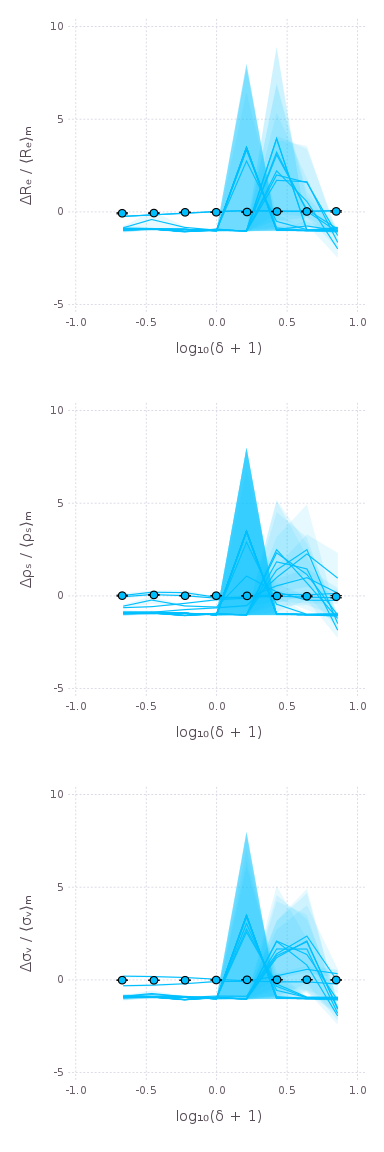

/home/users/kww231/dev/cenquenbias/dat/mcmc/M20b/Re_surf_vdisp/max_init/


In [647]:
vpost = post_draw_ribbons(4, 7, ndraws = 100, chain_range = 10:15, like_cutoff = -3e6, subdir = "max_init")

draw(SVG("finfigs/postribbons_M20b_Re_surf_vdisp.svg", 4inch, 12inch), vpost)
draw(PDF("finfigs/postribbons_M20b_Re_surf_vdisp.pdf", 4inch, 12inch), vpost)
draw(PNG("finfigs/postribbons_M20b_Re_surf_vdisp.png", 4inch, 12inch), vpost)
display("image/png", read("finfigs/postribbons_M20b_Re_surf_vdisp.png"))